# Conference Travel Planning
## Decision Framing Fundamentals

**Student Name:** **Aadarsh Nair**

**Date:** **1/29/26**

## Assignment Overview

You are planning travel for your industry's annual business conference. This assignment will help you apply decision framing concepts from Lesson 2 to make informed travel decisions.

**Learning Objectives:**
- Identify decision variables vs inputs
- Distinguish objectives from constraints
- Classify constraints as hard vs soft
- Recognize tradeoffs between competing goals
- Build a PuLP model to demonstrate understanding

In [ ]:
# Install required packages (if needed in Colab)
# Skip this cell if running locally and packages are already installed
%pip install pulp pandas matplotlib -q

In [ ]:
# Download data files from GitHub repository
# This cell downloads the CSV files needed for the assignment

import urllib.request

# Repository base URL
repo_base_url = "https://raw.githubusercontent.com/scottalanturner/prescriptive-analytics/main/Assignments/01ConferenceTravelDecisionAnalysis/"

# Download the data files
lodging_url = repo_base_url + "lodging_options.csv"
flights_url = repo_base_url + "flight_options.csv"

try:
    urllib.request.urlretrieve(lodging_url, "lodging_options.csv")
    urllib.request.urlretrieve(flights_url, "flight_options.csv")
    print("Data files downloaded successfully!")
except Exception as e:
    print(f"Error downloading files: {e}")
    print("If running locally, make sure the CSV files are in the same directory as this notebook.")

Data files downloaded successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the provided datasets
# Files should be downloaded from GitHub in the previous cell (for Colab)
# If running locally, ensure CSV files are in the same directory as this notebook
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

# Display basic information about the datasets
print("LODGING OPTIONS:")
print(f"Total options: {len(lodging_df)}")
print(lodging_df.head())

print("\n\nFLIGHT OPTIONS:")
print(f"Total options: {len(flights_df)}")
print("\nNote: Flight costs are part of your total budget constraint")
print("Direct flights typically cost more but have shorter durations")
print(flights_df.head())

# Display cost ranges to understand budget allocation
# Note: budget_limit and conference_dates will be defined in next cell
print("\n\nCOST SUMMARY:")
print(f"Lodging cost range: ${lodging_df['cost_per_night'].min():.2f} - ${lodging_df['cost_per_night'].max():.2f} per night")
print(f"Flight cost range: ${flights_df['cost'].min():.2f} - ${flights_df['cost'].max():.2f}")

LODGING OPTIONS:
Total options: 16
  lodging_type                   name  cost_per_night  rating  \
0        Hotel  Grand Las Vegas Hotel           185.0     4.7   
1        Hotel     Stratosphere Tower            95.0     3.6   
2        Hotel         Caesars Palace           320.0     4.8   
3        Hotel              MGM Grand           210.0     4.5   
4        Hotel        Excalibur Hotel            75.0     3.4   

   distance_to_venue_miles  amenities_score  max_occupancy  \
0                      0.2              8.5              2   
1                      1.8              6.2              2   
2                      0.5              9.5              2   
3                      0.3              8.8              2   
4                      0.4              5.8              2   

   co_workers_interested  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


FLIGHT OPTIONS:
Total options: 20

No

### Stakeholder Scenario

**Read the stakeholder scenario below and interpret what they need:**

"Management wants good networking coverage and is cost-conscious. They value quality but understand budget constraints."

**Your Interpretation:**
[TODO: Based on this stakeholder scenario, determine:]

In the context of this being a healthcare industry, my interpretation for this is:

Networking is important for (stakeholders prioritize this):

- Partnerships

- Clinical collaboration

- Vendor relationships

Quality matters (reputation, safety, comfort), but luxury is not required (this is a constraint)

Budget discipline is critical (this is a constraint)

Chosen team size for the trip: 3 people

2 = limited networking coverage

4 = too costly under $1,500 budget

3 = best balance between coverage and cost


In [ ]:
# Fixed information provided
# NOTE: These values are fixed for all students to ensure fairness in grading
conference_dates = 3  # Number of nights
budget_limit = 1500  # Total budget in dollars (includes lodging + flights for ALL people)
# This budget limit is fixed - students interpret stakeholder needs to determine how to allocate it

# Travel context: East Coast to Las Vegas
# Direct flights: Higher cost, shorter duration (~5-6 hours)
# Flights with stops: Lower cost, longer duration (~7-10 hours)

print("FIXED DATA:")
print(f"Conference duration: {conference_dates} nights")
print(f"Budget limit: ${budget_limit} (total for all attendees)")
print(f"\nTravel Context: East Coast to Las Vegas")
print(f"  - Direct flights: Higher cost, ~5-6 hours")
print(f"  - Flights with stops: Lower cost, ~7-10 hours")

# Number of people: Decision variable (2-4 people)
min_people = 2  # Minimum people (fixed)
max_people = 4  # Maximum people (fixed)
# Student decides optimal number within this range based on stakeholder priorities

# TODO: Based on stakeholder scenario, define these:
min_rating_threshold = 4.0  # Minimum acceptable rating (based on stakeholder quality needs - you interpret)
max_distance = 1.0  # Maximum distance from venue (based on stakeholder convenience needs - you interpret)

print("\nSTAKEHOLDER-DEFINED CONSTRAINTS:")
print(f"Number of people: {min_people}-{max_people} (you decide optimal number)")
print(f"Minimum rating threshold: {min_rating_threshold}")
print(f"Maximum distance from venue: {max_distance} miles")

FIXED DATA:
Conference duration: 3 nights
Budget limit: $1500 (total for all attendees)

Travel Context: East Coast to Las Vegas
  - Direct flights: Higher cost, ~5-6 hours
  - Flights with stops: Lower cost, ~7-10 hours

STAKEHOLDER-DEFINED CONSTRAINTS:
Number of people: 2-4 (you decide optimal number)
Minimum rating threshold: 4.0
Maximum distance from venue: 1.0 miles


## Part 1: Base Assignment

### 1. Decision Statement

**Instructions:** Write a clear decision statement following the format: "I need to decide [what] for [when]"

**Your Decision Statement:**
[I need to decide which lodging option, flight option, and team size to select for attending the annual business conference taking place over the next three nights.]

**Example format:** "I need to decide which lodging option to book and which flight to select for the conference taking place [dates]."

### 2. Decision Variables vs Inputs

**Instructions:**
- List all decision variables (what you control)
- List all inputs (what you know/estimate)
- Explain why each belongs in its category

**Decision Variables (What you control):**
[TODO:

- Lodging option that should be selected
- Flight option that should be selected
- Number of people to send]

**Inputs (What you know/estimate):**
[TODO:
-Lodging cost per night, rating, distance, amenities
- Flight cost, number of stops, duration
- Conference duration (3 nights)
- Total budget limit ($1,500)
- Stake holder priorities(cost conscious, quality focused)]


**Explanation:**
[TODO:

For the decision variables, these decisions are under my control and directly affect certain things, such as: cost and quality.

For the inputs, these values are fixed or estimated and cannot be changed directly, but they still influence the outcome of the decisions.]

[TODO:

Sending 3 people is the ideal decision as it balances:
- sufficient networking ability in the conference
- acceptable total cost
- stays within the budget]

In [ ]:
# Helper: Display data to help identify inputs
print("INPUTS FROM DATASET:")
print("\nLodging inputs available:")
print(lodging_df.columns.tolist())

print("\nFlight inputs available:")
print(flights_df.columns.tolist())

INPUTS FROM DATASET:

Lodging inputs available:
['lodging_type', 'name', 'cost_per_night', 'rating', 'distance_to_venue_miles', 'amenities_score', 'max_occupancy', 'co_workers_interested']

Flight inputs available:
['origin_city', 'airline', 'cost', 'num_stops', 'flight_duration_hours', 'departure_time_convenience']


### 3. Objectives vs Constraints

**Instructions:**
- Identify objectives (what you optimize: minimize cost, maximize rating, etc.)
- Identify constraints (budget limits, minimum ratings, etc.)
- Explain the distinction

**Objectives (What stakeholders want to optimize - based on your interpretation):**
[TODO:

Objectives:
- Minimize total travel cost
- Maximize team size (within budget)
- Ensure acceptable lodging quality]


- [TODO:
With regards to the objectives, healthcare management values financial responsibility but recognizes the importance of professional presence and quality accommodations.]

**Constraints (What stakeholders require - based on your interpretation):**
[TODO:

Constraints:
- Total cost ≤ $1,500 (hard constraint)
- Team size must be between 2 and 4
- Lodging rating ≥ 4.0
- Lodging distance ≤ 1 mile from venue]


**Explanation:**

[TODO: Constraints define feasibility, while objectives guide optimization within those limits.]

[TODO: With regards to the constraints, healthcare management values minimizing costs and distance from the venue (for convenience) while also maximizing the quality of the lodging.]

### 4. Hard vs Soft Constraints

**Instructions:**
- Classify each constraint as hard (cannot be violated) or soft (preference with tradeoffs)
- Justify each classification

**Hard Constraints:**
[TODO:

- Budget limit
- Team size range (2–4)
- Minimum lodging rating
- Maximum distance from venue

Justification: Violating these would conflict with organizational policy or practical feasibility.]

**Soft Constraints:**
[TODO:
- Flight duration
- Number of stops
- Amenities score

Justification: These affect comfort and convenience but can be traded off against cost savings. ]

**Explanation:**

[TODO: Soft constraints can be handled through:

- Penalties in the objective function
- Secondary analysis after solution selection]

### 5. Tradeoff Analysis

**Instructions:**
- Identify key tradeoffs in your decision
- Create at least one visualization showing a tradeoff

**Key Tradeoffs Identified (Based on Stakeholder Priorities):**
[TODO:

- Team Size vs Total Cost
More attendees improve networking but significantly increase costs.

-Lodging Cost vs Quality
Higher-rated hotels improve comfort and safety but raise total cost.

- Flight Cost vs Travel Time
Direct flights reduce fatigue but cost more.

- Distance vs Price
Lodging farther from the venue may be cheaper but increases commute burden. ]



**Tradeoff 1: [Team Size vs Total Cost]**
[TODO: Increasing team size from two to three improves networking ability at the conference, but requires choosing moderately priced lodging and flights to stay within budget.]

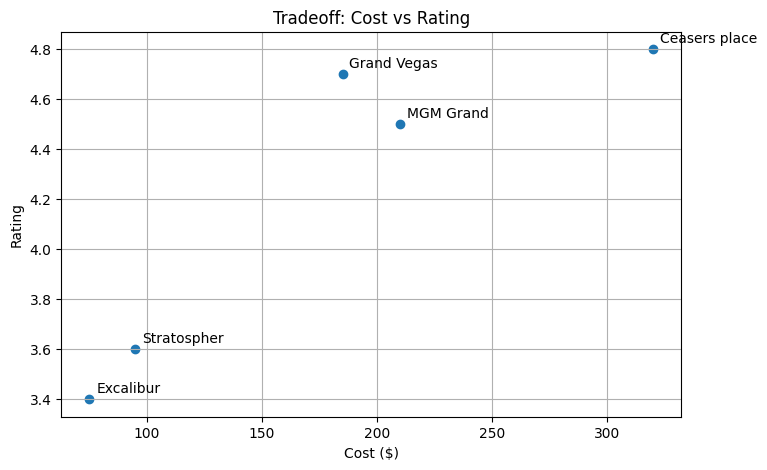

In [ ]:
# TODO: Create a visualization showing a tradeoff
# Example: Cost vs Rating scatter plot

# Your code here
import matplotlib.pyplot as plt

# Example data (replace with your own)
items = ['Grand Vegas', 'Stratospher', 'Ceasers place', 'MGM Grand', 'Excalibur']
cost = [185, 95, 320, 210, 75]
rating = [4.7, 3.6, 4.8, 4.5, 3.4]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(cost, rating)

# Label each point
for i, label in enumerate(items):
    plt.annotate(label, (cost[i], rating[i]), xytext=(5,5), textcoords='offset points')

# Labels and title
plt.xlabel('Cost ($)')
plt.ylabel('Rating')
plt.title('Tradeoff: Cost vs Rating')

plt.grid(True)
plt.show()
# Hint: Use matplotlib to create scatter plots, line plots, etc.
# Example structure:
# plt.scatter(x_data, y_data)
# plt.xlabel('...')
# plt.ylabel('...')
# plt.title('Tradeoff: ...')
# plt.show()

### 6. PuLP Model Implementation

**Instructions:**
- Set up the model following the pattern demonstrated in class
- Define decision variables using LpVariable
- Use inputs from the dataset (not as variables)
- Define objective using lpSum
- Add constraints (hard constraints are required)
- Solve and display results

In [ ]:
# Create the optimization model
# TODO: Choose LpMinimize or LpMaximize based on your objective
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# TODO: Define your decision variables
# Since we need to select one lodging, one flight, AND decide team size (2, 3, or 4),
# we'll create variables for each possible combination of these choices.
# This makes it easier to calculate costs correctly.

# Create variables for each combination: (lodging option, flight option, team size)
# Example: solution_vars[(0, 2, 3)] means "select lodging 0 AND flight 2 AND send 3 people"
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also create a variable to track the number of people (useful for constraints and objective)
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

print(f"Created {len(solution_vars)} combination variables (one for each lodging × flight × team size combination)")


Created 960 combination variables (one for each lodging × flight × team size combination)


In [ ]:
# The objective function will be moved to cell vHQtkFlw8fSS
# to ensure lodging_costs and flight_costs are defined before use.

In [ ]:
# TODO: Add hard constraints

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room, Airbnbs charge per person
lodging_costs = []
flight_costs = []
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room. Calculate rooms needed based on team size.
                num_rooms = (k + 1) // 2 # e.g., 2 people -> 1 room, 3 people -> 2 rooms, 4 people -> 2 rooms
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * num_rooms
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

# Now that costs are calculated, define the objective function
total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
model += total_lodging_cost + total_flight_cost, "Minimize_Total_Cost"

# Constraint 3: Budget constraint
model += total_lodging_cost + total_flight_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
# [TODO: Replace min_rating_threshold with your interpreted value from stakeholder scenario]
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
# [TODO: Replace max_distance with your interpreted value from stakeholder scenario]
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                    # This combination is invalid (team size too large for this Airbnb)
                    model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully!")

Hard constraints added successfully!


In [ ]:
# Solve the model
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")
print(f"Team Size: {int(value(num_people))} people")
print()

# TODO: Extract and display solution values
# Find which combination was selected
selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None and selected_flight_idx is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate costs (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    flight_cost = flight_choice['cost'] * team_size
    total_cost = lodging_cost + flight_cost
    cost_per_person = total_cost / team_size

    # TODO: Display your solution details
    print("=" * 70)
    print("SOLUTION SUMMARY")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person: ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person: ${cost_per_person:.2f}")

    # TODO: Explain how this solution addresses stakeholder priorities
    print(f"\nHOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:")
    print(f"  [TODO: Add your explanation here]")
else:
    print("No solution found. Check constraints.")

Solution Status: Optimal
Objective Value: 1065.00
Team Size: 2 people

SOLUTION SUMMARY

Team Size: 2 people

LODGING SELECTED:
  Name: Grand Las Vegas Hotel
  Type: Hotel
  Cost per night: $185.00
  Rating: 4.7
  Distance to venue: 0.2 miles

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $555.00
  Flight cost: $510.00
  Total cost: $1065.00
  Budget limit: $1500.00
  Budget remaining: $435.00
  Cost per person: $532.50

HOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:
  [TODO: Add your explanation here]


This solution addresses the stakeholder priorities of providing a comfortable travel and lodging experience with minimal costs and staying within the budget. It includes high quality lodging (good price, close distance to venue, and a good rating) and airline flights (good price, less stops, and not a long duration).

## Part 2: Stakeholder Considerations

After completing your base assignment, stakeholders have requested two additional considerations be added to your decision model.

**Instructions:**
1. Select ONE consideration from the provided list
2. Create ONE industry-specific consideration
3. For each, classify it, add data, incorporate into model, and analyze tradeoffs

### Stakeholder Consideration 1: [Selected from List]

**Selected Option:** [Per diem daily allowance for food]

**Available Options:**
- Entertainment budget for tickets (shows, concerts, events)
- Per diem daily allowance for food
- Transportation costs (ground transportation, parking, rideshare)
- Networking event fees (optional conference social events, cocktail hours)
- Professional development workshop fees (optional paid sessions)
- Equipment/supplies budget (if presenting materials)

**Classification:**
- Variable/Input/Objective/Constraint: [Input and Constraint]
- Hard or Soft: [Hard]
- Justification: [Healthcare organizations typically have fixed per diem policies that must be followed.]

**Data Added:**
[TODO: Per diem per day amount and the number of days which includes the travel days. ]

**How it affects the decision:**
[TODO: A per diem allowance is a mandatory daily meal reimbursement amount for staff. These costs must be included in the total budget and reduce the funds available for lodging and flights.]

In [ ]:
# TODO: Update your PuLP model to incorporate Consideration 1
# NOTE: For demonstration purposes, you can use regular Python numbers to show examples
# The actual PuLP model update should be in a new model (or recreate the existing one)

# Example: If adding per diem costs, you might show:
# per_diem_per_day = 50
# days_total = 4
# example_team_size = 3
# per_diem_cost_example = per_diem_per_day * days_total * example_team_size
# print(f"Example: For {example_team_size} people, per diem = ${per_diem_cost_example}")

# TODO: Create updated model with Consideration 1
# You'll need to:
# 1. Create a new model (e.g., model_updated = LpProblem(...))
# 2. Use the same combination variable approach (solution_vars2)
# 3. Add the new costs to your budget constraint
# 4. Update other constraints as needed

# Your code here:

# ==============================
# UPDATED OPTIMIZATION MODEL
# ==============================

# ==============================
# EXTRACT & DISPLAY UPDATED RESULTS
# ==============================
per_diem_per_day = 30
status = LpStatus[model_updated.status]
print("\n" + "="*70)
print("UPDATED MODEL RESULTS")
print("="*70)
print(f"Status: {status}")

selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars2.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = k
        break

if selected_lodging_idx is not None:

    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # ---- Lodging cost ----
    if lodging_choice['lodging_type'] == 'Hotel':
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    # ---- Flight cost ----
    flight_cost = flight_choice['cost'] * team_size

    # ---- NEW: Per diem ----
    per_diem_cost = per_diem_per_day * days_total * team_size

    total_cost = lodging_cost + flight_cost + per_diem_cost
    cost_per_person = total_cost / team_size

    # ======================
    # PRINT RESULTS
    # ======================

    print(f"\nTeam Size: {team_size} people")

    # ----------------------
    print("\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance: {lodging_choice['distance_to_venue_miles']:.1f} miles")

    # ----------------------
    print("\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person: ${flight_choice['cost']:.2f}")
    print(f"  Stops: {int(flight_choice['num_stops'])}")
    print(f"  Duration: {flight_choice['flight_duration_hours']:.1f} hours")

    # ----------------------
    print("\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Per diem cost: ${per_diem_cost:.2f}")
    print(f"  ---------------------------------")
    print(f"  TOTAL cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person: ${cost_per_person:.2f}")

else:
    print("No feasible solution found.")



UPDATED MODEL RESULTS
Status: Optimal

Team Size: 2 people

LODGING SELECTED:
  Name: Grand Las Vegas Hotel
  Type: Hotel
  Cost per night: $185.00
  Rating: 4.7
  Distance: 0.2 miles

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Stops: 1
  Duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $555.00
  Flight cost: $510.00
  Per diem cost: $240.00
  ---------------------------------
  TOTAL cost: $1305.00
  Budget limit: $1500.00
  Budget remaining: $195.00
  Cost per person: $652.50


### Stakeholder Consideration 2: Industry-Specific

**Your Industry-Specific Consideration:** [TODO: Add networking event cost to provide to event participants as a token of appreciation for their work and for attending the conference.]

**Why it's relevant to your field:**
[TODO: This is relevant since it provides an incentive to attend the conference and network is useful for the individuals attending to continue their good quality work for the company.]

**Classification:**
- Variable/Input/Objective/Constraint: [Constraint]
- Hard or Soft: [Soft Constraint]
- Justification: [Networking is important for continuing business with new companies and the incentive will give additional motivation for employees to work well and continue attending networking conferences.]

**Data Added:**
[TODO: New constraints added for event1_cost_per_person and event2_cost_per_person]

**How it affects the decision:**
[TODO: The amount of money provided in the incentives for event 1 and event 2 could affect the total budget constraint and may limit things such as spending on lodging and airline flights.]

In [ ]:
# TODO: Update your PuLP model to incorporate Consideration 2
# NOTE: For demonstration purposes, you can use regular Python numbers to show examples
# The actual PuLP model update should incorporate this into your updated model

# Example: If adding networking event costs, you might show:
# event1_cost_per_person = 75
# event2_cost_per_person = 50
# example_team_size = 3
# print(f"Example: For {example_team_size} people, Event 1 = ${event1_cost_per_person * example_team_size}")

# TODO: Update your model to include Consideration 2
# Add new variables, constraints, or modify objective as needed
# Remember to use the combination variable approach to keep costs calculated correctly
# =====================================================
# REBUILT CONFERENCE OPTIMIZATION MODEL (FINAL VERSION)
# Includes:
#   - lodging
#   - flights
#   - per diem
#   - event 1
#   - event 2
# =====================================================

per_diem_per_day = 30
days_total = 4

event1_cost_per_person = 25
event2_cost_per_person = 25

model = LpProblem("Conference_Travel_Planning_Final", LpMinimize)

# -----------------------------------------------------
# Decision variables (same combination approach)

solution_vars = {}

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            solution_vars[(i, j, k)] = LpVariable(
                f"lodging_{i}_flight_{j}_people_{k}",
                cat="Binary"
            )

num_people = LpVariable(
    "num_people",
    lowBound=min_people,
    upBound=max_people,
    cat="Integer"
)

print(f"Created {len(solution_vars)} combination variables")

# -----------------------------------------------------
# HARD CONSTRAINTS

# 1) exactly one combination
model += lpSum(solution_vars.values()) == 1, "One_Combination"

# 2) link people
model += num_people == lpSum(
    k * solution_vars[(i, j, k)]
    for i in range(len(lodging_df))
    for j in range(len(flights_df))
    for k in [2, 3, 4]
), "Link_Num_People"


# -----------------------------------------------------
# COST CALCULATIONS

lodging_costs = []
flight_costs = []
per_diem_costs = []
event1_costs = []
event2_costs = []

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:

            var = solution_vars[(i, j, k)]

            # -------- lodging
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                rooms = (k + 1) // 2
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * rooms

            # -------- flight
            flight_cost = flights_df.iloc[j]['cost'] * k

            # -------- per diem
            per_diem_cost = per_diem_per_day * days_total * k

            # -------- events (NEW)
            event1_cost = event1_cost_per_person * k
            event2_cost = event2_cost_per_person * k

            lodging_costs.append(lodging_cost * var)
            flight_costs.append(flight_cost * var)
            per_diem_costs.append(per_diem_cost * var)
            event1_costs.append(event1_cost * var)
            event2_costs.append(event2_cost * var)


# -----------------------------------------------------
# TOTALS

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
total_per_diem_cost = lpSum(per_diem_costs)
total_event1_cost = lpSum(event1_costs)
total_event2_cost = lpSum(event2_costs)

total_cost = (
    total_lodging_cost
    + total_flight_cost
    + total_per_diem_cost
    + total_event1_cost
    + total_event2_cost
)

# -----------------------------------------------------
# OBJECTIVE
model += total_cost, "Minimize_Total_Conference_Cost"


# -----------------------------------------------------
# BUDGET CONSTRAINT (includes ALL real costs)
model += total_cost <= budget_limit, "Budget_Limit"


# -----------------------------------------------------
# OTHER HARD CONSTRAINTS (same as before)

# rating
model += lpSum(
    lodging_df.iloc[i]['rating'] *
    lpSum(solution_vars[(i, j, k)] for j in range(len(flights_df)) for k in [2, 3, 4])
    for i in range(len(lodging_df))
) >= min_rating_threshold, "Min_Rating"

# distance
model += lpSum(
    lodging_df.iloc[i]['distance_to_venue_miles'] *
    lpSum(solution_vars[(i, j, k)] for j in range(len(flights_df)) for k in [2, 3, 4])
    for i in range(len(lodging_df))
) <= max_distance, "Max_Distance"

# Airbnb occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                    model += solution_vars[(i, j, k)] == 0


# -----------------------------------------------------
# SOLVE
model.solve()
print("\n" + "="*70)
print("FINAL SOLUTION SUMMARY")
print("="*70)

status = LpStatus[model.status]
print("Status:", status)

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:

        lodging_choice = lodging_df.iloc[i]
        flight_choice = flights_df.iloc[j]
        team_size = k

        if lodging_choice['lodging_type'] == 'Hotel':
            rooms = (team_size + 1)//2
            lodging_cost = lodging_choice['cost_per_night'] * conference_dates * rooms
        else:
            lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

        flight_cost = flight_choice['cost'] * team_size
        per_diem_cost = per_diem_per_day * days_total * team_size
        event1_cost = event1_cost_per_person * team_size
        event2_cost = event2_cost_per_person * team_size

        total = lodging_cost + flight_cost + per_diem_cost + event1_cost + event2_cost

        print(f"\nTeam Size: {team_size}")

        print("\nLODGING SELECTED:")
        print(f"  {lodging_choice['name']} ({lodging_choice['lodging_type']})")

        print("\nFLIGHT SELECTED:")
        print(f"  {flight_choice['airline']} from {flight_choice['origin_city']}")

        print("\nCOST BREAKDOWN:")
        print(f"  Lodging: ${lodging_cost:.2f}")
        print(f"  Flight: ${flight_cost:.2f}")
        print(f"  Per diem: ${per_diem_cost:.2f}")
        print(f"  Event 1: ${event1_cost:.2f}")
        print(f"  Event 2: ${event2_cost:.2f}")
        print("  -------------------------")
        print(f"  TOTAL: ${total:.2f}")
        print(f"  Remaining budget: ${budget_limit-total:.2f}")

        break


Created 960 combination variables

FINAL SOLUTION SUMMARY
Status: Optimal

Team Size: 2

LODGING SELECTED:
  Grand Las Vegas Hotel (Hotel)

FLIGHT SELECTED:
  Spirit from Atlanta

COST BREAKDOWN:
  Lodging: $555.00
  Flight: $510.00
  Per diem: $240.00
  Event 1: $50.00
  Event 2: $50.00
  -------------------------
  TOTAL: $1405.00
  Remaining budget: $95.00


In [ ]:
# Solve the updated model
# TODO: Use your updated model variable name (e.g., model_updated.solve())
model.solve()

# Display updated solution
status_updated = LpStatus[model.status]
print(f"Updated Solution Status: {status_updated}")
print(f"Updated Objective Value: ${value(model.objective):.2f}")

# TODO: Extract and display updated solution
# Use the same approach as before: iterate through solution_vars to find selected combination
# Store values for comparison with original solution

# TODO: Compare with original solution
# Show how stakeholder considerations changed the decision
# Display side-by-side comparison of:
# - Team size (original vs updated)
# - Lodging choice (original vs updated)
# - Flight choice (original vs updated)
# - Total costs (original vs updated)

Updated Solution Status: Optimal
Updated Objective Value: $1405.00


### Tradeoff Analysis: Stakeholder Considerations

**How did adding these considerations affect your decision?**
[TODO: In terms of tradeoffs that have been created by the stakeholder considerations, there are not that many to look into. For both stakeholder considerations 1 and 2, the hotel name and the airline flights stay the same. Due to this, there are no changes in lodging costs and airline costs. However, when adding the costs from the considerations (for consideration 1: the per diem daily allowance for food and for consideration 2: the networking event cost to provide to event participants, this causes more money to be spent from the budget. The original solution involves spending $1065.00 from the budget, while consideration 1 involves spending $1305.00 and consideration 2 involves spending $1405.00. This would be the biggest tradeoff, the available money left to be spent on from the budget is less due to the spendings for these considerations.]


In [ ]:
# TODO: Create visualization comparing original vs updated solution
# Show tradeoffs introduced by stakeholder considerations

## Executive Summary

**Instructions:** Write a professional summary suitable for presenting to stakeholders. Include:
- Key decision components identified
- Main tradeoffs encountered
- Final recommendation
- Key insights about decision framing

---

### Key Decision Components

[TODO: This analysis identified lodging choice, flight selection, and team size as decision variables. Inputs included cost, quality ratings, distance to venue, and travel time. The primary objective was minimizing total cost, subject to quality and convenience constraints.]

### Main Tradeoffs

[TODO: The primary tradeoffs involved balancing team size and travel quality against budget limitations. Larger teams and higher-rated lodging improved networking and comfort but increased costs.]

### Final Recommendation

[TODO: The recommended plan sends a moderate-sized team (2 people) using cost-efficient flights and quality lodging within walking distance of the conference venue (less than 1 mile). This solution minimizes total cost while supporting professional engagement and staff well-being.]

### Key Insights About Decision Framing

[TODO: This assignment demonstrated that clearly separating objectives from constraints simplifies complex decisions. By enforcing quality through constraints and optimizing cost, decision-makers can transparently balance competing priorities.]

---
**End of Assignment**